In [53]:
import pandas as pd
import json
import glob
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path



In [54]:

# Specify the directory containing the JSON files
json_directory = r"C:\Users\sharm\Downloads"

# List to store the dataframes for each playlist
ls_df_playlists = []
ls_df_tracks = []

# Loop through the JSON files
for i in range(10):
    file_path = os.path.join(json_directory, f"mpd.slice.{i*1000}-{i*1000+999}.json")
    
    # Load the JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)
        
    # Extract playlist data
    playlists = data['playlists']
    
    # Convert playlist data to a dataframe
    df_playlists = pd.DataFrame.from_records(playlists)
    ls_df_playlists.append(df_playlists)
    
    # Extract tracks data
    for playlist in playlists:
        df_temp = pd.DataFrame.from_records(playlist['tracks'])
        df_temp['pid'] = playlist['pid']
        ls_df_tracks.append(df_temp)

# Concatenate playlist dataframes
df_playlists = pd.concat(ls_df_playlists, ignore_index=True)

# Concatenate tracks dataframes
df_tracks = pd.concat(ls_df_tracks, ignore_index=True)


In [55]:
# Description of the data
data_description = df_playlists.describe(include='all')
print("Data Description:")
print(data_description)

Data Description:
           name collaborative          pid   modified_at    num_tracks  \
count     10000         10000  10000.00000  1.000000e+04  10000.000000   
unique     5954             2          NaN           NaN           NaN   
top     Country         false          NaN           NaN           NaN   
freq        144          9793          NaN           NaN           NaN   
mean        NaN           NaN   4999.50000  1.476726e+09     66.471200   
std         NaN           NaN   2886.89568  3.629090e+07     53.487764   
min         NaN           NaN      0.00000  1.318205e+09      5.000000   
25%         NaN           NaN   2499.75000  1.459814e+09     26.000000   
50%         NaN           NaN   4999.50000  1.490573e+09     50.000000   
75%         NaN           NaN   7499.25000  1.505628e+09     91.000000   
max         NaN           NaN   9999.00000  1.509494e+09    250.000000   

          num_albums  num_followers  \
count   10000.000000    10000.00000   
unique         

In [56]:
# Summary statistics
summary_statistics = df_playlists.describe()
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
               pid   modified_at    num_tracks    num_albums  num_followers  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000    10000.00000   
mean    4999.50000  1.476726e+09     66.471200     49.684000        3.50220   
std     2886.89568  3.629090e+07     53.487764     39.722617      161.03533   
min        0.00000  1.318205e+09      5.000000      2.000000        1.00000   
25%     2499.75000  1.459814e+09     26.000000     20.000000        1.00000   
50%     4999.50000  1.490573e+09     50.000000     37.000000        1.00000   
75%     7499.25000  1.505628e+09     91.000000     68.000000        1.00000   
max     9999.00000  1.509494e+09    250.000000    233.000000    15842.00000   

          num_edits   duration_ms   num_artists  
count  10000.000000  1.000000e+04  10000.000000  
mean      17.926500  1.558164e+07     38.246900  
std       20.809195  1.274594e+07     30.246617  
min        2.000000  7.197680e+05      3.000000  
25%        5.0000

In [57]:

# Data features
data_features = df_playlists.columns.tolist()
print("\nData Features:")
print(data_features)




Data Features:
['name', 'collaborative', 'pid', 'modified_at', 'num_tracks', 'num_albums', 'num_followers', 'tracks', 'num_edits', 'duration_ms', 'num_artists', 'description']


In [58]:
#General Analysis

In [59]:
# Total number of records
total_records = df_playlists.shape[0]
print("\nTotal Number of Records:", total_records)




Total Number of Records: 10000


In [103]:
# Total count of null values
null_value_count = df_playlists.isnull().sum()
print("\nTotal Count of Null Values:", null_value_count)

# Total count of artists
total_artists = len(df_tracks['artist_name'].unique())
print("Total Number of Artists:", total_artists)

# Total count of tracks
total_tracks = len(df_tracks)
print("Total Number of Tracks:", total_tracks)



Total Count of Null Values: name             0
collaborative    0
pid              0
modified_at      0
num_tracks       0
num_albums       0
num_followers    0
tracks           0
num_edits        0
duration_ms      0
num_artists      0
description      0
dtype: int64
Total Number of Artists: 35637
Total Number of Tracks: 664712


In [63]:
# Display first few rows of the dataframe
print("\nFirst Few Rows of the Data:")
print(df_playlists.head())




First Few Rows of the Data:
               name collaborative  pid  modified_at  num_tracks  num_albums  \
0        Throwbacks         false    0   1493424000          52          47   
1  Awesome Playlist         false    1   1506556800          39          23   
2           korean          false    2   1505692800          64          51   
3               mat         false    3   1501027200         126         107   
4               90s         false    4   1401667200          17          16   

   num_followers                                             tracks  \
0              1  [{'pos': 0, 'artist_name': 'Missy Elliott', 't...   
1              1  [{'pos': 0, 'artist_name': 'Survivor', 'track_...   
2              1  [{'pos': 0, 'artist_name': 'Hoody', 'track_uri...   
3              1  [{'pos': 0, 'artist_name': 'Camille Saint-Saën...   
4              2  [{'pos': 0, 'artist_name': 'The Smashing Pumpk...   

   num_edits  duration_ms  num_artists description  
0          6    

In [64]:
# Dataframe information summary
print("\nDataframe Information Summary:")
print(df_playlists.info())




Dataframe Information Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10000 non-null  object
 1   collaborative  10000 non-null  object
 2   pid            10000 non-null  int64 
 3   modified_at    10000 non-null  int64 
 4   num_tracks     10000 non-null  int64 
 5   num_albums     10000 non-null  int64 
 6   num_followers  10000 non-null  int64 
 7   tracks         10000 non-null  object
 8   num_edits      10000 non-null  int64 
 9   duration_ms    10000 non-null  int64 
 10  num_artists    10000 non-null  int64 
 11  description    197 non-null    object
dtypes: int64(8), object(4)
memory usage: 937.6+ KB
None


In [67]:
# Replace null values with zero
df_playlists.fillna(0, inplace=True)


In [68]:
# Total count of null values
null_value_count = df_playlists.isnull().sum().sum()
print("\nTotal Count of Null Values:", null_value_count)




Total Count of Null Values: 0


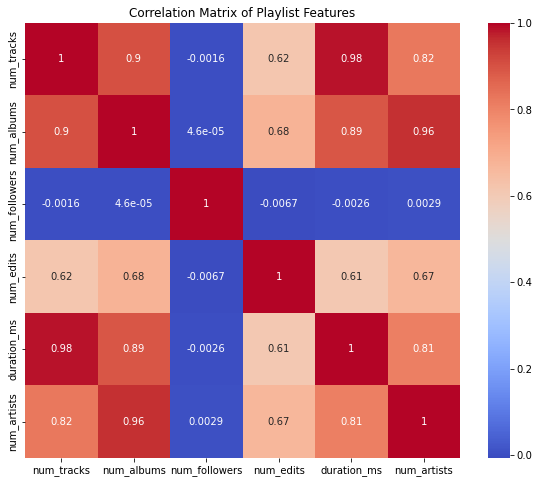

In [104]:
# Selecting numeric features for correlation matrix
numeric_features = ['num_tracks', 'num_albums', 'num_followers', 'num_edits', 'duration_ms', 'num_artists']

# Creating a correlation matrix
correlation_matrix = df_playlists[numeric_features].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Playlist Features')
plt.show()


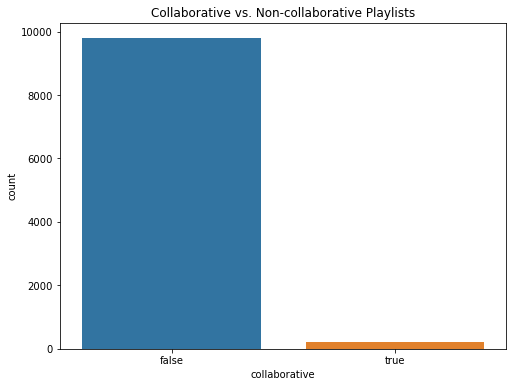

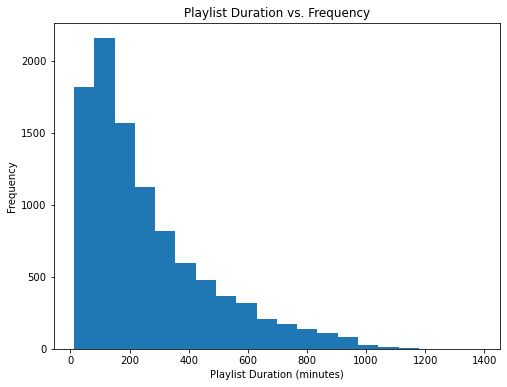

In [69]:

# Count plot of collaborative playlists
plt.figure(figsize=(8, 6))
sns.countplot(x='collaborative', data=df_playlists)
plt.title('Collaborative vs. Non-collaborative Playlists')
plt.show()

# Histogram of playlist durations
plt.figure(figsize=(8, 6))
plt.hist(df_playlists['duration_ms'] / (1000 * 60), bins=20)  # Convert to minutes
plt.xlabel('Playlist Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Playlist Duration vs. Frequency')
plt.show()


In [70]:
#Playlist Analysis

In [71]:
# Number of playlists
num_playlists = df_playlists['pid'].nunique()
print("Number of Playlists:", num_playlists)

# Average playlist duration
avg_playlist_duration = df_playlists['duration_ms'].mean() / (1000 * 60)  # Convert to minutes
print("Average Playlist Duration (minutes):", avg_playlist_duration)

# Most common playlist name
most_common_name = df_playlists['name'].mode().values[0]
print("Most Common Playlist Name:", most_common_name)


Number of Playlists: 10000
Average Playlist Duration (minutes): 259.69401309
Most Common Playlist Name: Country


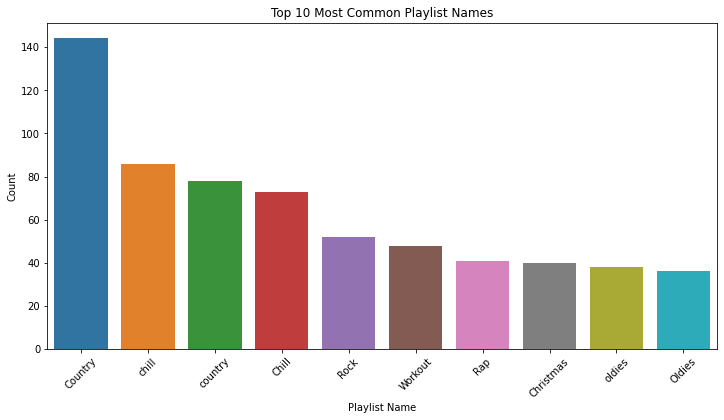

In [72]:

# Bar plot of the top 10 most common playlist names
top_playlist_names = df_playlists['name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_playlist_names.index, y=top_playlist_names.values)
plt.xticks(rotation=45)
plt.xlabel('Playlist Name')
plt.ylabel('Count')
plt.title('Top 10 Most Common Playlist Names')
plt.show()


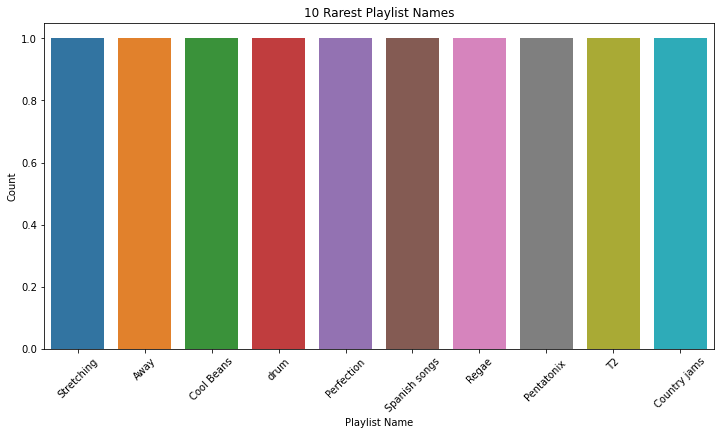

In [81]:
# 10 rarest playlist names
rarest_playlist_names = df_playlists['name'].value_counts().tail(10)

# Create the bar plot for 10 rarest playlist names
plt.figure(figsize=(12, 6))
sns.barplot(x=rarest_playlist_names.index, y=rarest_playlist_names.values)
plt.xticks(rotation=45)
plt.xlabel('Playlist Name')
plt.ylabel('Count')
plt.title('10 Rarest Playlist Names')
plt.show()


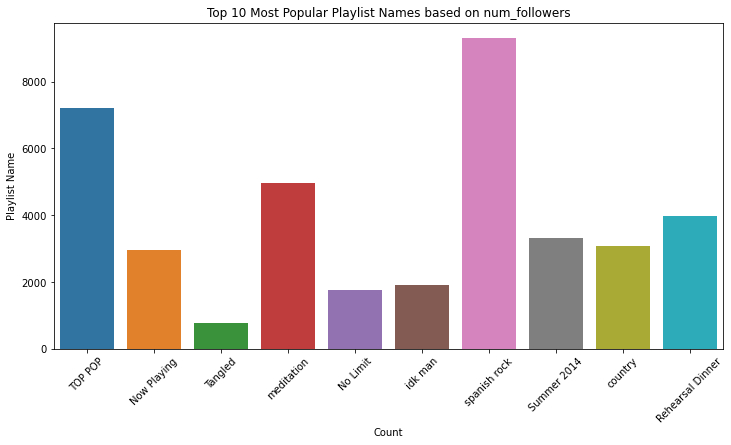

In [82]:
# Top 10 most popular playlist names based on num_followers
top_playlist_names = df_playlists.sort_values(by='num_followers', ascending=False)['name'].head(10)

# Create the bar plot for top 10 most popular playlist names with interchanged axes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_playlist_names.values, y=top_playlist_names.index)
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Playlist Name')
plt.title('Top 10 Most Popular Playlist Names based on num_followers')
plt.show()


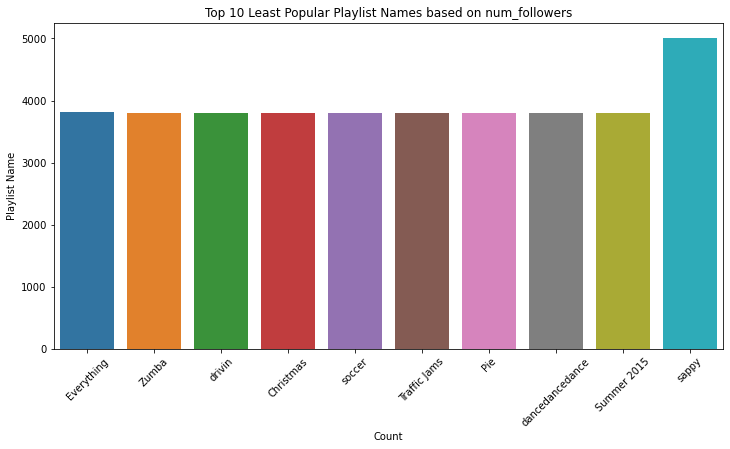

In [99]:
# Top 10 least popular playlist names based on num_followers
top_playlist_names = df_playlists.sort_values(by='num_followers', ascending=False)['name'].tail(10)

# Create the bar plot for top 10 most popular playlist names with interchanged axes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_playlist_names.values, y=top_playlist_names.index)
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Playlist Name')
plt.title('Top 10 Least Popular Playlist Names based on num_followers')
plt.show()


In [74]:
#Track Analysis

In [75]:
# Number of unique tracks
num_unique_tracks = df_tracks['track_uri'].nunique()
print("Number of Unique Tracks:", num_unique_tracks)

# Most common track name
most_common_track_name = df_tracks['track_name'].mode().values[0]
print("Most Common Track Name:", most_common_track_name)

# Average track duration
avg_track_duration = df_tracks['duration_ms'].mean() / (1000 * 60)  # Convert to minutes
print("Average Track Duration (minutes):", avg_track_duration)


Number of Unique Tracks: 170089
Most Common Track Name: Closer
Average Track Duration (minutes): 3.906865124896196


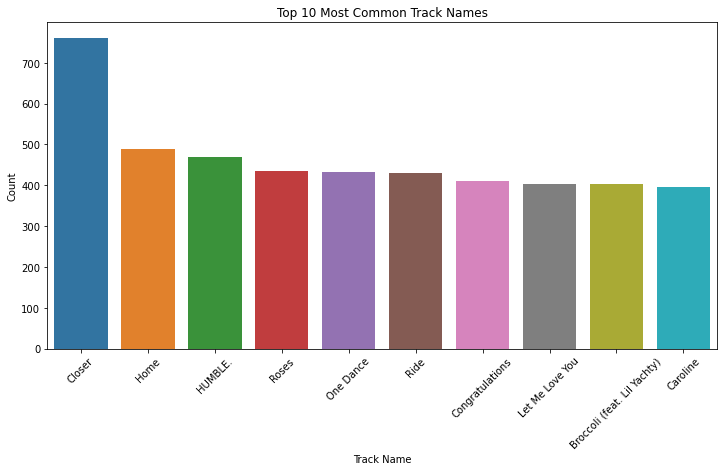

In [76]:
# Bar plot of the top 10 most common track names
top_track_names = df_tracks['track_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_track_names.index, y=top_track_names.values)
plt.xticks(rotation=45)
plt.xlabel('Track Name')
plt.ylabel('Count')
plt.title('Top 10 Most Common Track Names')
plt.show()


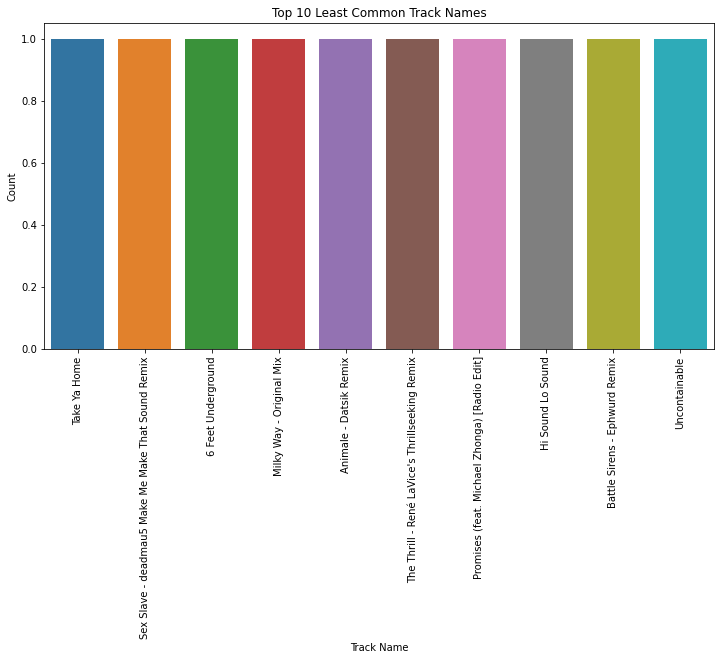

In [98]:
# Bar plot of the top 10 least common track names
top_track_names = df_tracks['track_name'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_track_names.index, y=top_track_names.values)
plt.xticks(rotation=90)
plt.xlabel('Track Name')
plt.ylabel('Count')
plt.title('Top 10 Least Common Track Names')
plt.show()


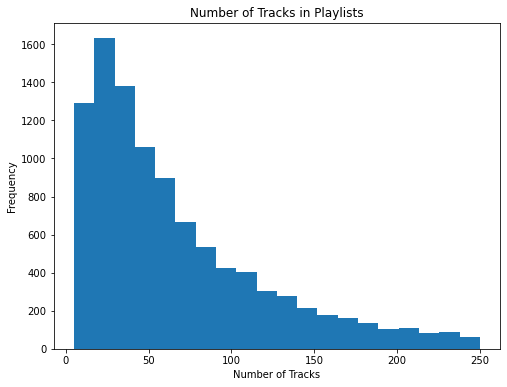

In [100]:
plt.figure(figsize=(8, 6))
plt.hist(df_playlists['num_tracks'], bins=20)
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.title('Number of Tracks in Playlists')
plt.show()


In [ ]:
#Artist Analysis

In [37]:
# Number of unique artists
num_unique_artists = df_tracks['artist_name'].nunique()
print("Number of Unique Artists:", num_unique_artists)

# Top 5 most common artists
top_artists = df_tracks['artist_name'].value_counts().head(5)
print("Top 5 Most Common Artists:")
print(top_artists)


Number of Unique Artists: 35637
Top 5 Most Common Artists:
Drake             8474
Kanye West        3894
Kendrick Lamar    3336
Rihanna           3181
The Weeknd        2985
Name: artist_name, dtype: int64


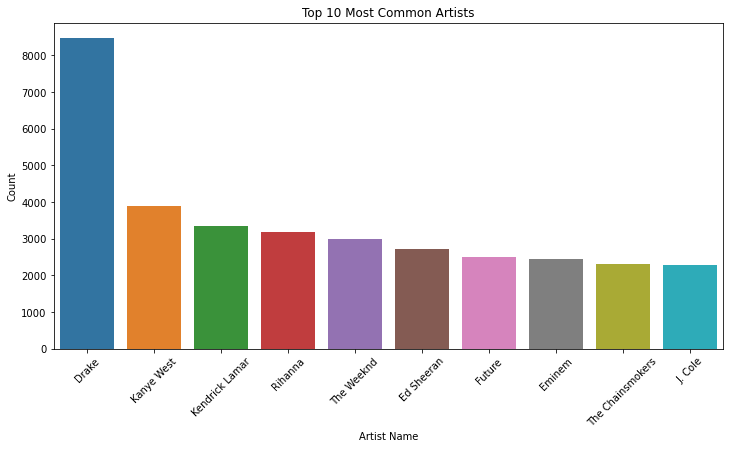

In [42]:
# Bar plot of the top 10 most common artists
top_artists = df_tracks['artist_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45)
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.title('Top 10 Most Common Artists')
plt.show()


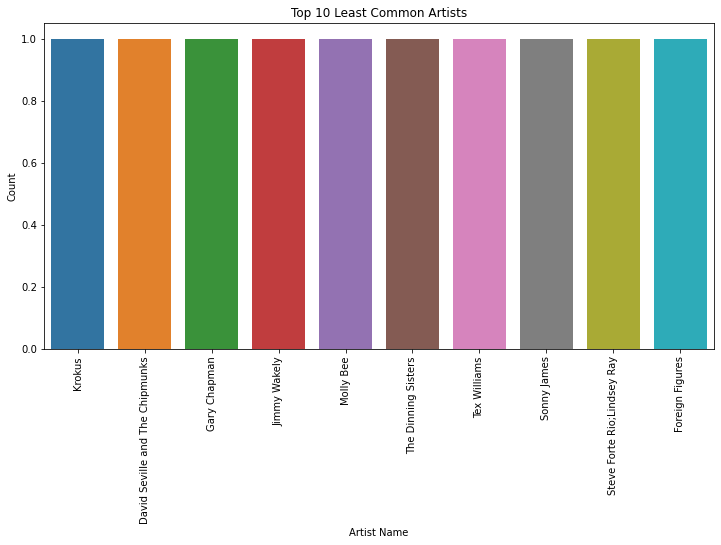

In [97]:
# Bar plot of the top 10 most common artists
top_artists = df_tracks['artist_name'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.title('Top 10 Least Common Artists')
plt.show()


In [ ]:
#Album Analysis

In [38]:
# Number of unique albums
num_unique_albums = df_tracks['album_name'].nunique()
print("Number of Unique Albums:", num_unique_albums)

# Top 5 most common albums
top_albums = df_tracks['album_name'].value_counts().head(5)
print("Top 5 Most Common Albums:")
print(top_albums)


Number of Unique Albums: 69059
Top 5 Most Common Albums:
Views            2071
Stoney           1534
Greatest Hits    1478
More Life        1419
DAMN.            1398
Name: album_name, dtype: int64


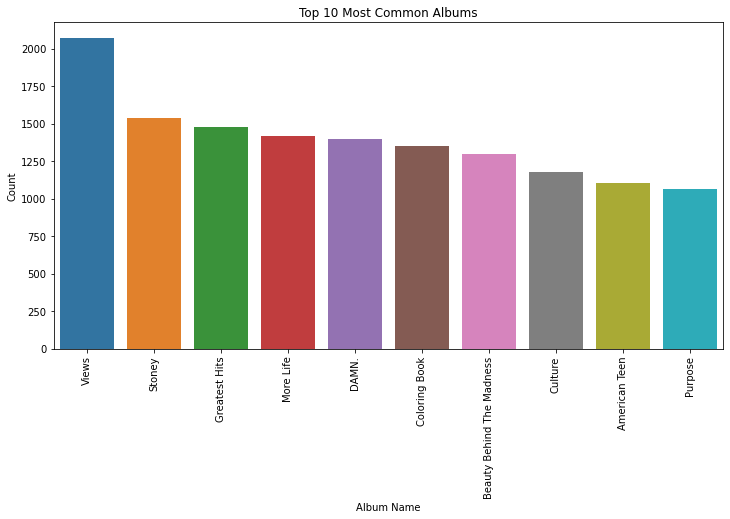

In [95]:
# Bar plot of the top 10 most common albums
top_albums = df_tracks['album_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_albums.index, y=top_albums.values)
plt.xticks(rotation=90)
plt.xlabel('Album Name')
plt.ylabel('Count')
plt.title('Top 10 Most Common Albums')
plt.show()


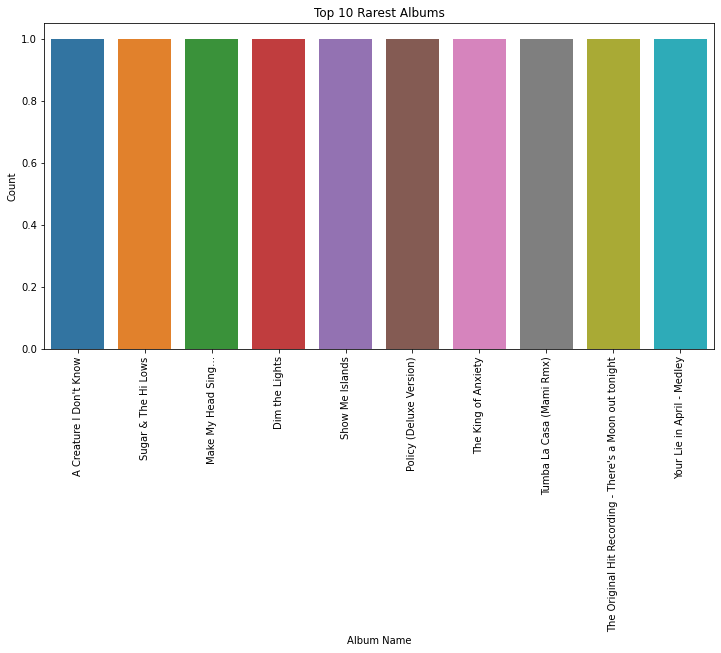

In [93]:
# Bar plot of the top 10 rarest albums
rare_albums = df_tracks['album_name'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=rare_albums.index, y=rare_albums.values)
plt.xticks(rotation=90)
plt.xlabel('Album Name')
plt.ylabel('Count')
plt.title('Top 10 Rarest Albums')
plt.show()
